<a href="https://colab.research.google.com/github/JSW-JW/Clustering_Estimation_Lab/blob/main/Active_Semi_Supervised_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Active Semi-Supervised Clustering

In [26]:
!pip install active-semi-supervised-clustering

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets, metrics
from active_semi_clustering.semi_supervised.pairwise_constraints import PCKMeans
from active_semi_clustering.active.pairwise_constraints import ExampleOracle, ExploreConsolidate, MinMax

In [58]:
X, y = datasets.load_iris(return_X_y=True)

In [70]:
origin = datasets.load_iris()
data = datasets.load_iris()
# origin.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [60]:
def dist(i, S, points):
    distances = np.array([np.sqrt(((points[i] - points[j]) ** 2).sum()) for j in S])
    return distances.min()

print(X[0])
print(X[1])
np.sqrt((X[0] - X[1]) ** 2).sum()

[5.1 3.5 1.4 0.2]
[4.9 3.  1.4 0.2]


0.6999999999999993

In [61]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

First, obtain some pairwise constraints from the oracle.

In [62]:
# TODO implement your own oracle that will, for example, query a domain expert via GUI or CLI
oracle = ExampleOracle(y, max_queries_cnt=10)

active_learner = MinMax(n_clusters=3)
active_learner.fit(X, oracle=oracle)
pairwise_constraints = active_learner.pairwise_constraints_

Then, use the constraints to do the clustering.

In [63]:
clusterer = PCKMeans(n_clusters=3)
clusterer.fit(X, ml=pairwise_constraints[0], cl=pairwise_constraints[1])

In [64]:
metrics.adjusted_rand_score(y, clusterer.labels_)

0.7302382722834697

In [53]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

k = 3

# 그룹 수, random_state 설정
clusterer = KMeans(n_clusters = k, random_state = 10)
df = pd.DataFrame(data.data, columns=data.feature_names)

# 정규화 진행
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(df)

# 정규화된 데이터에 학습
clusterer = clusterer.fit(data_scale)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
# df['cluster'] = model.fit_predict(data)

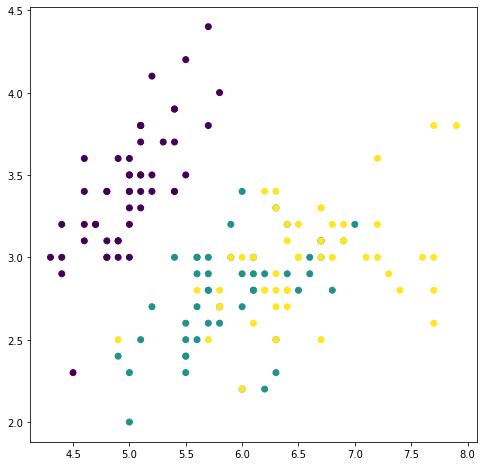

In [71]:
## Ground Truth

df_origin = pd.DataFrame(origin.data, columns=origin.feature_names)

plt.figure(figsize = (8, 8))
plt.scatter(df_origin.iloc[:,0].values, df_origin.iloc[:,1].values, c=origin.target.astype(float))

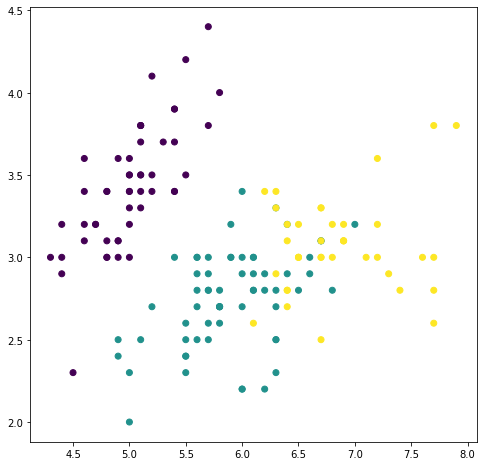

In [65]:
## PCKMeans clustering

df = pd.DataFrame(data.data, columns=data.feature_names)

plt.figure(figsize = (8, 8))
plt.scatter(df.iloc[:,0].values, df.iloc[:,1].values, c=clusterer.labels_.astype(float))

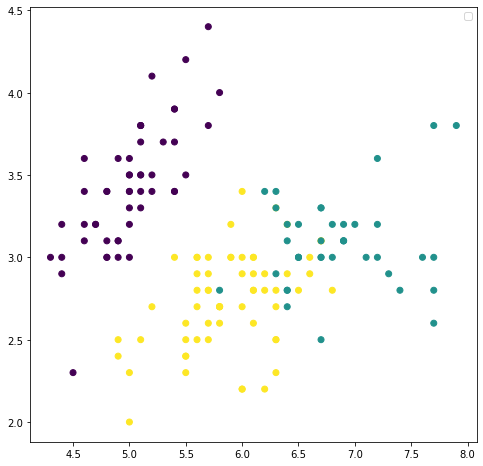

In [54]:
## K-means clustering

import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))
plt.scatter(df.iloc[:,0].values, df.iloc[:,1].values, c=clusterer.labels_.astype(float))

plt.legend()
# plt.title('K = %d results'%k , size = 15)
# plt.xlabel('Annual Income', size = 12)
# plt.ylabel('Spending Score', size = 12)
plt.show()